In [3]:
import pandas as p 
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split 
 
# Breast cancer dataset  
data = p.read_csv("data.csv") 
data.info()
data.drop(["id"],axis=1,inplace=True) 
M=data[data.diagnosis=="M"] 
B=data[data.diagnosis=="B"] 


data.diagnosis=[1 if i == "M" else 0 for i in data.diagnosis] 
x=data.drop(["diagnosis"],axis=1) 
y=data.diagnosis.values 
 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) 
 
from sklearn.tree import DecisionTreeRegressor 
model=DecisionTreeRegressor() 
model.fit(x_train,y_train) 
y_pred=model.predict(x_test) 
 
print("\nAccuracy of the model using Decision tree regression algorithm is ",r2_score(y_test,y_pred)) 
 
from sklearn.ensemble import RandomForestRegressor 
model1 = RandomForestRegressor() 
model1.fit(x_train,y_train) 
y_pred1 = model1.predict(x_test) 
print("\nAccuracy of the model using Random forest regression algorithm is ",r2_score(y_test,y_pred1)) 

from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)


# Train the SVR model
model2 = SVR()
model2.fit(x_train_imputed, y_train)
# Predict and calculate accuracy
y_pred2 = model2.predict(x_test_imputed)
print('\nAccuracy of the model SVR algorithm is', r2_score(y_test, y_pred2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


decision tree regression  0.7314391776127926


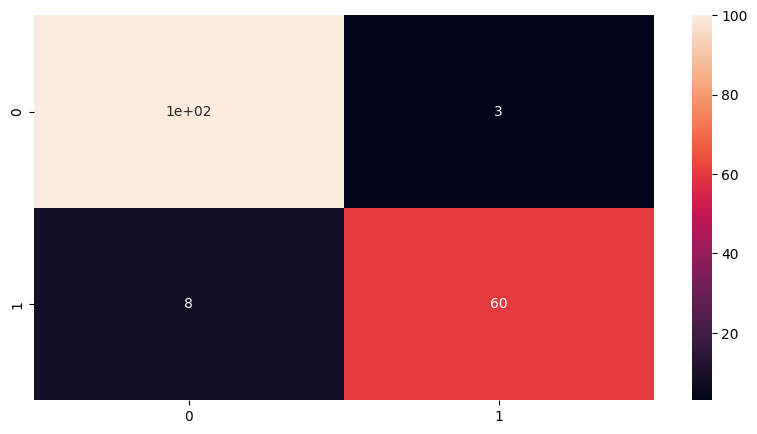

random forest regression 0.832639244852058
svc  0.6960245636716225


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [57]:
import pandas as p
import matplotlib.pyplot as m
data=p.read_csv('data.csv')
data.drop(['id'],axis=1,inplace=True)
M=data[data.diagnosis=='M']
B=data[data.diagnosis=='B']

data.diagnosis=[1 if i =='M' else 0 for i in data.diagnosis]
x=data.drop(['diagnosis'],axis=1)
y=data.diagnosis.values
from sklearn.metrics import r2_score,confusion_matrix
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

import seaborn as s
import matplotlib.pyplot as m
from sklearn.tree import DecisionTreeRegressor
da=DecisionTreeRegressor()
da.fit(x_train,y_train)
y_pred=da.predict(x_test)
print('decision tree regression ',r2_score(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)
m.figure(figsize=(10,5))
s.heatmap(cm,annot=True)
m.show()

from sklearn.ensemble import RandomForestRegressor
ds=RandomForestRegressor()
ds.fit(x_train,y_train)
y_pred=ds.predict(x_test)
print('random forest regression',r2_score(y_pred,y_test))

from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
y_train_i=impute.fit_transform(x_train)
x_test_i=impute.fit_transform(x_test)

mod=SVC()
mod.fit(y_train_i,y_train)
y_pred=mod.predict(x_test_i)
print('svc ',r2_score(y_pred,y_test))